## Exercícios 8.10 da primeiro livro

In [38]:
import control as ctl
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank

A = np.array([[0, 1, 0],
             [-0.97, 1.8, 0],
             [0, 0, 0.95]])
B = np.array([[1], [0], [1]])
C = np.array([[1, 0, 1]])
T= 0.1

In [39]:
# Matriz de controlabilidade
ctrb = B
for i in range(1, A.shape[0]):
    ctrb = np.hstack((ctrb, np.linalg.matrix_power(A, i) @ B))
print('Controlability matrix:\n', ctrb)
rank_of_controllability = matrix_rank(ctrb)
print('Rank of controlability matrix:', rank_of_controllability)
# Matriz de observabilidade
obsv = C
for i in range(1, A.shape[0]):
    obsv = np.vstack((obsv, C @ np.linalg.matrix_power(A, i)))
print('Observability matrix:\n', obsv)
rank_of_observability = matrix_rank(obsv)
print("Rank of observability matrix:", rank_of_observability)

Controlability matrix:
 [[ 1.      0.     -0.97  ]
 [ 0.     -0.97   -1.746 ]
 [ 1.      0.95    0.9025]]
Rank of controlability matrix: 3
Observability matrix:
 [[ 1.      0.      1.    ]
 [ 0.      1.      0.95  ]
 [-0.97    1.8     0.9025]]
Rank of observability matrix: 3


C:\Users\Pedro\AppData\Local\Temp\ipykernel_10676\1091995018.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hist[k] = y


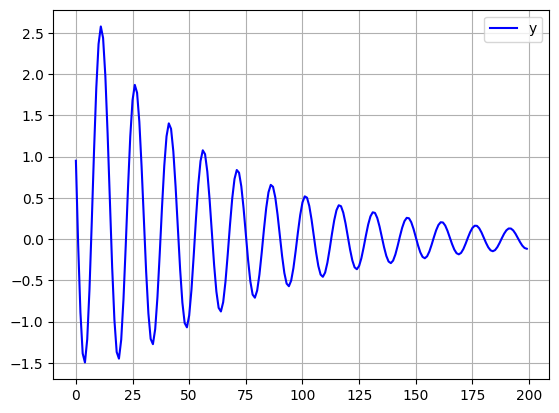

In [40]:
# Estado inicial do sistema
N = 200
u = np.zeros(N)
x = np.array([[1], [0], [1]]).flatten()
y= np.dot(C, x)

# Simulação do sistema
x_hist = np.zeros((3, N))
y_hist = np.zeros(N)

for k in range(N):
    x = np.dot(A, x) + B.flatten() * u[k]
    y = np.dot(C, x)
    x_hist[:, k] = x
    y_hist[k] = y

# Plot dos resultados
plt.plot(range(N), y_hist, '-b', label='y')
plt.legend()
plt.grid()
plt.show()

In [41]:
#7. Fórmula de Ackerman para o cálculo de K para o sistema com polinômio característico desejado
G = ctl.acker(A, B, (0.9, 0.9, 0.9))
print('K:', G)

K: [[0.04923077 0.11673275 0.00076923]]


C:\Users\Pedro\AppData\Local\Temp\ipykernel_10676\3355939940.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hist[k] = y


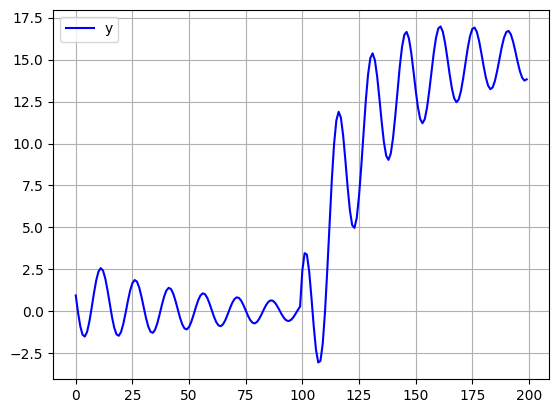

In [42]:
# Simulação dos sistema com atraso de k=100
x = np.array([[1], [0], [1]]).flatten()
y= np.dot(C, x)

# Transição em degrau unitário em k=5
N = 200
u = np.zeros(N)
u[100:] = 1

# Simulação do sistema
x_hist = np.zeros((3, N))
y_hist = np.zeros(N)

for k in range(N):
    x = np.dot(A, x) + B.flatten() * u[k]
    y = np.dot(C, x)
    x_hist[:, k] = x
    y_hist[k] = y

# Plot dos resultados
plt.plot(range(N), y_hist, '-b', label='y')
plt.legend()
plt.grid()
plt.show()

C:\Users\Pedro\AppData\Local\Temp\ipykernel_10676\781018147.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hist[k] = y


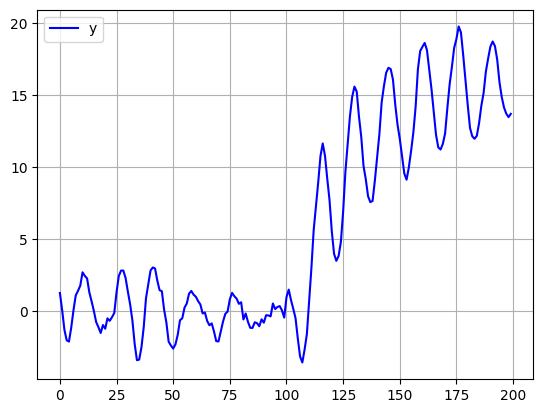

In [43]:
# Simulação dos sistema com ruído gaussiano
x = np.array([[1], [0], [1]]).flatten()
y= np.dot(C, x)

# Transição em degrau unitário em k=5
N = 200
u = np.zeros(N)
u[100:] = 1
u[:] = u + np.random.normal(0, 0.15, N)

# Simulação do sistema
x_hist = np.zeros((3, N))
y_hist = np.zeros(N)

for k in range(N):
    x = np.dot(A, x) + B.flatten() * u[k]
    y = np.dot(C, x)
    x_hist[:, k] = x
    y_hist[k] = y

# Plot dos resultados
plt.plot(range(N), y_hist, '-b', label='y')
plt.legend()
plt.grid()
plt.show()

In [53]:
# Simulação dos sistema com ruído e condição inicial aleatória
x = np.array([[np.random.normal(0, 1, 1)], [np.random.normal(0, 1, 1)], [np.random.normal(0, 1, 1)]]).flatten()
y= np.dot(C, x)
x_obs = np.array([[np.random.normal(0, 1, 1)], [np.random.normal(0, 1, 1)], [np.random.normal(0, 1, 1)]]).flatten()
y_obs = np.dot(C, x_obs)

# Transição em degrau unitário em k=5
N = 200
u = np.zeros(N)
u[100:] = 1
u[:] = u + np.random.normal(0, 15, N)

# Simulação do sistema
x_hist = np.zeros((3, N))
y_hist = np.zeros(N)
x_obs_hist = np.zeros((3, N))
y_obs_hist = np.zeros(N)

for k in range(N):
    x = np.dot(A, x) + B.flatten() * u[k]
    y = np.dot(C, x)
    x_hist[:, k] = x
    y_hist[k] = y
    
    print(aux)
    x_obs = np.dot(A, x_obs) + B.flatten() * u[k] + G * (y - np.dot(C, x))
    y_obs = np.dot(C, x_obs.T)
    x_obs_hist[:, k] = x_obs
    y_obs_hist[k] = y_obs

# Plot dos resultados
plt.plot(range(N), y_hist, '-b', label='y')
plt.plot(range(N), y_obs_hist, '-r', label='y_obs')
plt.legend()
plt.grid()
plt.show()

[[0. 0. 0.]]
[[0. 0. 0.]]


C:\Users\Pedro\AppData\Local\Temp\ipykernel_10676\1147803763.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hist[k] = y
C:\Users\Pedro\AppData\Local\Temp\ipykernel_10676\1147803763.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_obs_hist[k] = y_obs


ValueError: shapes (3,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [ ]:
# 3. Matriz de controlabilidade
ctrb = B
for i in range(1, A.shape[0]):
    ctrb = np.hstack((ctrb, np.linalg.matrix_power(A, i) @ B))
print('Controlability matrix:\n', ctrb)
rank_of_controllability = matrix_rank(ctrb)
print('Rank of controlability matrix:', rank_of_controllability)


Controlability matrix:
 [[ 1.      0.     -0.97  ]
 [ 0.     -0.97   -1.746 ]
 [ 1.      0.95    0.9025]]
Rank of controlability matrix: 3


In [ ]:
# 4. Polinomio característico
poly = np.poly(A)
print('Polinômio:', poly)

Polinômio: [ 1.     -2.75    2.68   -0.9215]


In [ ]:
#5. Polinômio com raízes lambda = 0.7, 0.8, 0.9
novo_poli = np.poly((0.7, 0.8, 0.9))
print('Polinômio:', novo_poli)

Polinômio: [ 1.    -2.4    1.91  -0.504]


In [ ]:
#6. Fórmula de Ackerman manualmente para o cálculo de K para o sistema com polinômio característico desejado
K = np.array([[0, 0, 1]]) @ np.linalg.inv(ctrb) @ novo_poli[:-1]

In [ ]:
#7. Fórmula de Ackerman para o cálculo de K para o sistema com polinômio característico desejado
K = ctl.acker(A, B, (0.7, 0.8, 0.9))
print('K:', K)

K: [[ 0.33846154 -0.18715305  0.01153846]]


In [ ]:
# 8. Simulação do sistema com u = r - Kx e r sendo um sinal nulo de 1 <= K <= 5 e 0.06 de 6 <= K <= 100
x = np.array([[0], [0], [0]]).flatten()
y= np.dot(C, x)

# Transição em degrau unitário em k=5
N = 100
u = np.zeros(N)
u[5:] = 0.06 - K @ x

# Simulação do sistema
x_hist = np.zeros((3, N))
y_hist = np.zeros(N)

for k in range(N):
    x = np.dot(A, x) + B.flatten() * u[k]
    y = np.dot(C, x)
    x_hist[:, k] = x
    y_hist[k] = y
    u[k+1] = 0.06 - K @ x

# Plot dos resultados
plt.plot(range(N), y_hist, '-b', label='y')
plt.legend()
plt.show()

C:\Users\Pedro\AppData\Local\Temp\ipykernel_10676\2499986696.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hist[k] = y
C:\Users\Pedro\AppData\Local\Temp\ipykernel_10676\2499986696.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u[k+1] = 0.06 - K @ x


IndexError: index 100 is out of bounds for axis 0 with size 100